### BANK EXPLORATORY DATA ANALAYSIS

#### Project Objective

#### Importing Libraries and dataset

In [1]:
# data wrangling libraries
import pandas as pd
import numpy as np

#data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistical analysis libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
data = pd.read_csv('cleaned_bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
data.drop(columns=['contact','day','pdays','previous', 'poutcome'],
          inplace=True)

In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
month        0
duration     0
campaign     0
deposit      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1510 non-null   int64 
 1   job        1510 non-null   object
 2   marital    1510 non-null   object
 3   education  1510 non-null   object
 4   default    1510 non-null   object
 5   balance    1510 non-null   int64 
 6   housing    1510 non-null   object
 7   loan       1510 non-null   object
 8   month      1510 non-null   object
 9   duration   1510 non-null   int64 
 10  campaign   1510 non-null   int64 
 11  deposit    1510 non-null   object
dtypes: int64(4), object(8)
memory usage: 141.7+ KB


### EDA

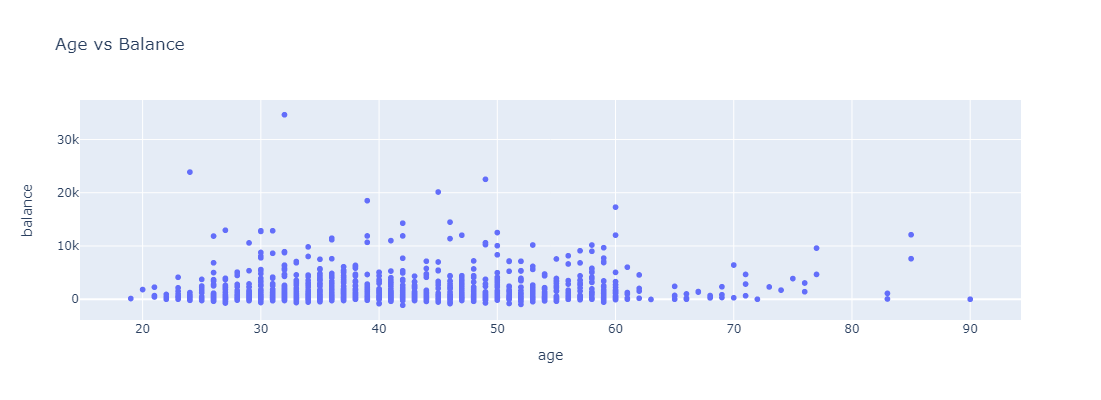

In [12]:
px.scatter(data_frame=data, x='age', y='balance',
           height=400, width=800, title='Age vs Balance')

leave a reason for performing the test here

In [14]:
# define your hypothesis

null = 'There is no correlation between age and balance'
alternative = 'There is a correlation between age and balance'

# define your alpha level
alpha = 0.05

# decision rule
# if p < alpha: reject null hypothesis else: fail to reject null hypothesis

# calculate the correlation coefficient and get the p-value

test_stats, pvalue = stats.spearmanr(data.age, data.balance)

# conclusion

if pvalue < alpha:
    print(f'{alternative} as the p-value ({pvalue}) < alpha ({alpha}) @ correlation coefficient of {test_stats}')
else:
    print(f'{null} as the p-value ({pvalue}) > alpha ({alpha}) @ correlation coefficient of {test_stats}')

There is a correlation between age and balance as the p-value (1.1976863487849076e-05) < alpha (0.05) @ correlation coefficient of 0.11240066344770012


comment on your findings in the correlation analysis

In [17]:
px.histogram(data_frame=data, x = 'marital', y = 'balance',
             title = 'Bar chart of Marital vs balance', histfunc = 'avg')

In [23]:
# check if marital status has an effect on balance


# define your hypothesis
null = 'There is no difference in deposit across marital status'
alternative = 'There is a difference in deposit across marital status'

# define your alpha level
alpha = 0.05

# decision rule
# if p < alpha: reject null hypothesis else: fail to reject null hypothesis

# calculate the correlation coefficient and get the p-value

married = data[data.marital == 'married'].balance
single = data[data.marital == 'single'].balance
divorced = data[data.marital == 'divorced'].balance

test_stats, pvalue = stats.f_oneway(married, single, divorced)

# conclusion

if pvalue < alpha:
    print(f'{alternative} with pvalue of {pvalue} and conclude that there is a difference in deposit across marital status')
else:
    print(f'{null} and conclude that there is no difference in deposit across marital status')

There is no difference in deposit across marital status and conclude that there is no difference in deposit across marital status


write comments on your findings

#### Chisquare test

##### check if there is an association between marital status and loan

In [30]:
px.histogram(data_frame = data, x = 'marital', color = 'loan',
             barmode = 'group', title = 'Bar chart of loan and marital status')

In [34]:
# set hypothesis

null = 'There is no association between marital status and loan'
alternative = 'There is an association between marital status and loan'

# choose alpha
alpha = 0.05

marital_loan = pd.crosstab(data['marital'], data['loan'])

test, pvalue, dof, exp = stats.chi2_contingency(marital_loan)

# conclusion

if pvalue < alpha:
    print(f'{alternative} @ pvalue = {pvalue}')
else:
    print(f'{null} @ pvalue = {pvalue}')

There is no association between marital status and loan @ pvalue = 0.9133398586552108
